## Linear regression

In [1]:
from ds_discovery import Transition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tr = Transition.from_memory()
tr.set_source_uri("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_1d.csv", header=None)
df = tr.load_source_canonical()

X: independent input variables or predictors like price, no of days taken for delivery, etc

Y: dependent or response variable – customer satisfaction.

In [4]:
X = df[0].to_numpy()
Y = df[1].to_numpy()

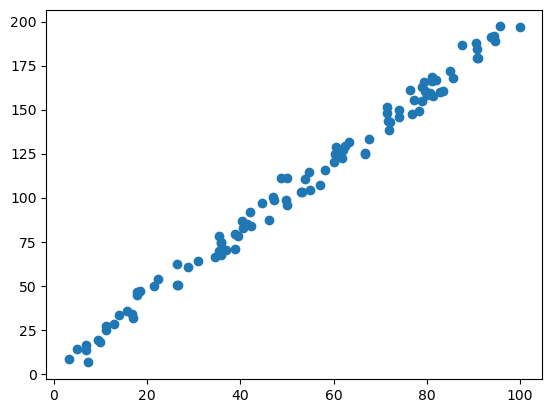

In [5]:
plt.scatter(X, Y)
plt.show()

### Line of best fit
We want to calculate $ a $ and $ b $ to find the estimated slope of the line at $ y $

$$ denominator = \sum_i x_i^2 - \bar x_i * \sum x_i  $$

In [6]:
denominator = X.dot(X) - X.mean() * X.sum()

$$ a = \frac{\sum_i x_i y_i - \bar y_i * \sum_i x_i}{denominator}  $$

In [7]:
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator

$$ b = \frac{\bar y_i * \sum_i x_i^2 - \bar x_i * \sum_i x_i y_i}{denominator}  $$

In [8]:
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

$$ \hat y = ax + b $$

In [9]:
# predicted Y
Yhat = a*X + b

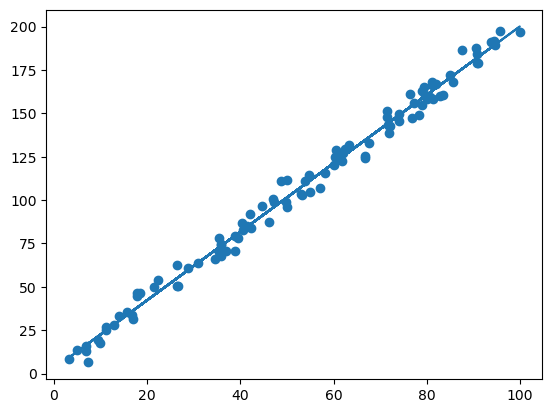

In [10]:
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

### Sum of Squares Errors
The sum of squared errors represents **sum of squares error** ($ E $), also known as **residual sum of squares** or **Mean Squared Error**. It is the difference between the observed value and the predicted value. Sum of squares explains how many individual values are away from the mean, it helps to know the variability in the data.

$$ E = \sum_i \left( y_i - \hat y_i \right)^2 $$

In [11]:
d1 = Y - Yhat
ssr = d1.dot(d1)

$$ \text{sum of squared total} = \sum_i \left( y_i - \bar y_i \right)^2 $$

In [12]:
d2 = Y - Y.mean()
sst = d2.dot(d2)

$$ R^2 = 1 - \frac{SSres}{SStot}  $$

In [13]:
# calculating r-squared
r2 = 1 - ssr/sst
print(f"The r-squared is: {r2}")

The r-squared is: 0.9911838202977805


------------------------
## Example 2 
------------------------
Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

In [14]:
USAhousing = pd.read_csv('https://raw.githubusercontent.com/project-hadron/hadron-asset-bank/master/datasets/hello_hadron/USA_Housing.csv')

In [15]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: name 'y_test' is not defined